CSCI 347
Project 3
Names: Moiyad Alfawwar, Michael Roduin, Philip Ghede

## Problem 1: Think about the data

## Part 2: Write Python code for clustering

In [2]:
# libraries
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston
import math
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans

## Part 3: Analyze your data

1. (4 points) Use sklearn’s PCA implementation to linearly transform the data to two dimensions.
Create a scatter plot of the data, with the x-axis corresponding to coordinates of the data
along the first principal component, and the y-axis corresponding to coordinates of the data
along the second principal component. Does it look like there are clusters in these two
dimensions? If so, how many would you say there are?

Text(0, 0.5, 'principle component 2')

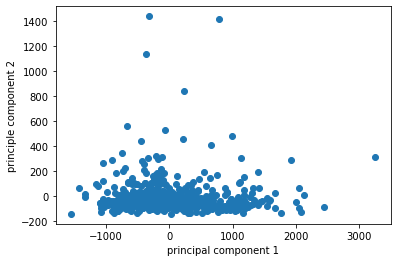

In [42]:
Data = np.genfromtxt('data/water-treatment.data', delimiter=",")
pca = PCA(n_components=2)
Data2 = np.delete(Data, [0],1)
D3 = Data2[:, ~np.isnan(Data2).any(axis=0)]
pca_data = pca.fit_transform(D3)
# Data2
pca_data

plt.scatter(pca_data[:,0],pca_data[:,1])
plt.xlabel('principal component 1')
plt.ylabel('principle component 2')

2. (3 points) Use sklearn’s PCA implementation to linearly transform the data, without spec-
ifying the number of components to use. Create a plot with r, the number of components
(i.e., dimensionality), on the x-axis, and f (r), the fraction of total variance captured in the
first r principal components, on the y-axis. Based on this plot, choose a number of principal
components to reduce the dimensionality of the data. Report how many principal components
will be used as well as the faction of total variance captured using this many components.

Text(0, 0.5, 'fraction of total variance')

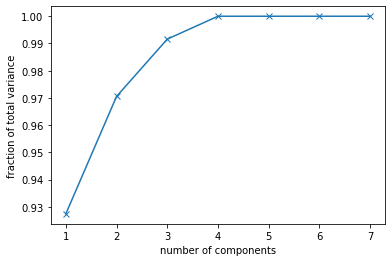

In [67]:
pca2 = PCA()
pca_data2 = pca2.fit_transform(D3)

plt.plot(range(1,8),np.cumsum(pca2.explained_variance_ratio_), marker='x')
plt.xlabel('number of components')
plt.ylabel('fraction of total variance')

3. (5 points) For both the original and the reduced-dimensionality data obtained using PCA in
question 3.2, do the following: Experiment with a range of values for the number of clusters,
k, that you pass as input to the k-means function, to find clusters in the chosen data set. Use
at least 5 different values of k. For each value of k, report the value of the objective function
for that choice of k.

In [78]:
kmeans1 = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans2 = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
kmeans3 = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=0)
kmeans4 = KMeans(n_clusters=6, init='k-means++', max_iter=300, random_state=0)
kmeans5 = KMeans(n_clusters=7, init='k-means++', max_iter=300, random_state=0)


pred_labels1 = kmeans1.fit_predict(D3)
pred_labels_pca1 = kmeans1.fit_predict(pca_data2)
pred_labels2 = kmeans2.fit_predict(D3)
pred_labels_pca2 = kmeans2.fit_predict(pca_data2)
pred_labels3 = kmeans3.fit_predict(D3)
pred_labels_pca3 = kmeans3.fit_predict(pca_data2)
pred_labels4 = kmeans4.fit_predict(D3)
pred_labels_pca4 = kmeans4.fit_predict(pca_data2)
pred_labels5 = kmeans5.fit_predict(D3)
pred_labels_pca5 = kmeans5.fit_predict(pca_data2)
pred_labels1[:300]
pred_labels_pca1[:100]

pred_labels_pca5[:100]

array([4, 3, 0, 4, 4, 0, 2, 2, 5, 0, 2, 5, 5, 3, 5, 2, 2, 0, 0, 2, 1, 0,
       4, 5, 4, 2, 5, 1, 1, 2, 2, 2, 5, 5, 5, 2, 4, 0, 2, 2, 5, 5, 5, 2,
       2, 5, 2, 2, 4, 1, 5, 2, 0, 5, 2, 2, 0, 2, 4, 5, 2, 2, 0, 5, 0, 2,
       0, 0, 0, 5, 5, 1, 2, 2, 2, 2, 1, 5, 6, 2, 2, 2, 1, 1, 0, 5, 1, 5,
       1, 4, 5, 2, 5, 5, 5, 2, 2, 5, 5, 2])

4. (5 points) For both the original and the reduced-dimensionality data obtained using PCA in
question 3.2, do the following: Experiment with a range of values for the minpts and $\epsilon$ input
parameters to the DBSCAN function to find clusters in the chosen data set. First, keep $\epsilon$
fixed and try out a range of different values for minpts. Then keep minpts fixed, and try a
range of values for $\epsilon$. Use at least 5 values of $\epsilon$ and at least 5 values of minpts. Report the
number of clusters found for each (minpts, $\epsilon$) pair tested.

In [79]:
dbs1 = DBSCAN(eps=0.5, min_samples=5)
dbs2 = DBSCAN(eps=0.5, min_samples=6)
dbs3 = DBSCAN(eps=0.5, min_samples=7)
dbs4 = DBSCAN(eps=0.5, min_samples=8)
dbs5 = DBSCAN(eps=0.5, min_samples=9)
dbs_e1 = DBSCAN(eps=0.5, min_samples=5)
dbs_e2 = DBSCAN(eps=0.7, min_samples=5)
dbs_e3 = DBSCAN(eps=0.9, min_samples=5)
dbs_e4 = DBSCAN(eps=1.1, min_samples=5)
dbs_e5 = DBSCAN(eps=1.3, min_samples=5)

5. (Extra credit - 3 points): Create a plot of clustering precision for each value of k used in
question 3.3, each value of $\epsilon$ used in question 3.4, and each value of minpts used in question
3.4, for both the original and reduced-dimensionality data.